# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [45]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from newsapi import NewsApiClient
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jayha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [46]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api_key")

In [47]:
type(api_key)

str

In [48]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [49]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(
    q="Bitcoin",# AND BTC", 
    language="en",
    page_size=100,
    #sort_by='relevancy'
)
# Print bitcoin articles  
print(btc_articles)

{'status': 'ok', 'totalResults': 7558, 'articles': [{'source': {'id': 'wired', 'name': 'Wired'}, 'author': 'Paul Ford', 'title': 'A Field Guide for Nature-Resistant Nerds', 'description': 'Yes, yes, the dirt is horrifying. But it’s also how we make bitcoin apps.', 'url': 'https://www.wired.com/story/a-field-guide-for-nature-resistant-nerds-microchips-climate-change/', 'urlToImage': 'https://media.wired.com/photos/61086c497b8c62be3062fe82/191:100/w_1280,c_limit/WI090121_MG_Ford_01.jpg', 'publishedAt': '2021-08-06T11:00:00Z', 'content': 'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]'}, {'source': {'id': 'wired', 'name': 'Wired'}, 'author': 'Khari Johnson', 'title': 'Why Not Use Self-Driving Cars as Supercomputers?', 'description': 'Autonomous vehicles use the equivalent of 200 laptops to get around. Some want to tap that 

In [50]:
# Show the total number of news
btc_articles["totalResults"]

7558

In [51]:
# Show sample article
btc_articles["articles"][0]

{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Paul Ford',
 'title': 'A Field Guide for Nature-Resistant Nerds',
 'description': 'Yes, yes, the dirt is horrifying. But it’s also how we make bitcoin apps.',
 'url': 'https://www.wired.com/story/a-field-guide-for-nature-resistant-nerds-microchips-climate-change/',
 'urlToImage': 'https://media.wired.com/photos/61086c497b8c62be3062fe82/191:100/w_1280,c_limit/WI090121_MG_Ford_01.jpg',
 'publishedAt': '2021-08-06T11:00:00Z',
 'content': 'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]'}

In [52]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(
    q="Ethereum",# AND ETH", 
    language="en",
    page_size=100,
    #sort_by='relevancy'
)
print(eth_articles)

{'status': 'ok', 'totalResults': 2994, 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'}, 'author': 'Lucas Matney', 'title': 'Tenderly raises $15.3M to help Ethereum developers ship decentralized apps faster', 'description': 'Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto space in 2021. The latest crypto startup to court the attenti…', 'url': 'http://techcrunch.com/2021/07/29/tenderly-raises-15-3m-to-help-ethereum-developers-ship-decentralized-apps-faster/', 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2021/07/Tenderly-Founding-Team-1.jpg?w=600', 'publishedAt': '2021-07-29T18:27:16Z', 'content': 'Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars]'}

In [53]:
# Show the total number of news
eth_articles["totalResults"]

2994

In [54]:
# Show sample article
eth_articles["articles"][0]

{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Lucas Matney',
 'title': 'Tenderly raises $15.3M to help Ethereum developers ship decentralized apps faster',
 'description': 'Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto space in 2021. The latest crypto startup to court the attenti…',
 'url': 'http://techcrunch.com/2021/07/29/tenderly-raises-15-3m-to-help-ethereum-developers-ship-decentralized-apps-faster/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2021/07/Tenderly-Founding-Team-1.jpg?w=600',
 'publishedAt': '2021-07-29T18:27:16Z',
 'content': 'Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars]'}

In [55]:
# Create the Bitcoin DataFrame, drop columns
btc_df = pd.DataFrame.from_dict(btc_news["articles"])
btc_df = btc_df.drop(columns = ["source", "author", "title", "description", "url", "urlToImage", "publishedAt"])
btc_df.head()
btc_corpus = btc_df

In [56]:
# Create the Bitcoin sentiment scores DataFrame
text_sent = {
    "text_compound":[],
    "text_pos":[],
    "text_neu":[],
    "text_neg":[],
    "text_sent":[],
}

for index, row in btc_df.iterrows():
    try:         
        text_sentiment = analyzer.polarity_scores(row["content"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_neg"].append(text_sentiment["compound"])
        
    except AttributeError:
        pass

In [57]:
def get_sentiment(articles):
    
    senti_out = []
    # Go through each article
    for article in articles:
        #print(article['content'])
        try:
            text      = article["content"]            
            sentiment = analyzer.polarity_scores(text)
            compound  = sentiment['compound']
            pos       = sentiment['pos']
            neg       = sentiment['neg']
            neu       = sentiment['neu']

                        
            senti_out.append({
                "Compound": compound,
                "Negative": neg,
                "Neutral":  neu,
                "Positive": pos,
                "text":     text
            })
        except AttributeError:
            pass
    
    
    return pd.DataFrame(senti_out)

In [58]:
# Create the Bitcoin sentiment scores DataFrame
text_sent = {
    "text_compound":[],
    "text_pos":[],
    "text_neu":[],
    "text_neg":[],
    "text_sent":[],
}

for index, row in btc_df.iterrows():
    try:         
        text_sentiment = analyzer.polarity_scores(row["content"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_neg"].append(text_sentiment["compound"])
        
    except AttributeError:
        pass

In [97]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment = get_sentiment(btc_articles['articles'])
btc_sentiment.head()


,Compound,Negative,Neutral,Positive,text
0,-0.3400,0.061,0.939,0.000,When my wife started a little garden in our ur...
1,0.6908,0.000,0.822,0.178,"Like Dogecoin devotees, the mayor of Reno, and..."
2,0.4019,0.000,0.920,0.080,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...
3,0.6187,0.000,0.847,0.153,Retailers are increasingly accepting cryptocur...
4,-0.8860,0.271,0.729,0.000,"By Joe TidyCyber reporter \r\n""Follow the mone..."


In [96]:
# Create the ethereum sentiment scores DataFrame
eth_sentiment = get_sentiment(eth_articles['articles'])
eth_sentiment.head()


,Compound,Negative,Neutral,Positive,text
0,-0.2411,0.061,0.939,0.000,Blockchain infrastructure startups are heating...
1,0.6956,0.000,0.810,0.190,Cent was founded in 2017 as an ad-free creator...
2,0.5719,0.000,0.861,0.139,"After the bell today, Coinbase reported anothe..."
3,0.0000,0.000,1.000,0.000,Representation of the Ethereum virtual currenc...
4,0.0000,0.000,1.000,0.000,"HONG KONG, Aug 5 (Reuters) - Ether held near t..."


In [61]:
# Describe the Bitcoin Sentiment
btc_sentiment.describe()

,Compound,Negative,Neutral,Positive
count,100.000000,100.000000,100.000000,100.000000
mean,0.074113,0.033130,0.914930,0.051960
std,0.355427,0.049849,0.072146,0.061349
min,-0.886000,0.000000,0.724000,0.000000
25%,-0.058000,0.000000,0.865000,0.000000
50%,0.000000,0.000000,0.920500,0.042500
75%,0.345300,0.069250,1.000000,0.084250
max,0.883400,0.271000,1.000000,0.274000


In [63]:
# Describe the Ethereum Sentiment
eth_sentiment.describe()

,Compound,Negative,Neutral,Positive
count,100.000000,100.000000,100.000000,100.00000
mean,0.035856,0.029310,0.928810,0.04186
std,0.351365,0.049312,0.068672,0.05557
min,-0.757900,0.000000,0.737000,0.00000
25%,-0.159300,0.000000,0.893000,0.00000
50%,0.000000,0.000000,0.930000,0.00000
75%,0.301550,0.060250,1.000000,0.07025
max,0.750600,0.177000,1.000000,0.20100


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin with the score of 0.0519600

Q: Which coin had the highest compound score?

A: Bitcoin with the scotre of 0.8834000

Q. Which coin had the highest positive score?

A: Bitcoin with the score of 0.2740000

## 2. Natural Language Processing
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [64]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [65]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
wnl = WordNetLemmatizer()
stop = stopwords.words("english")
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append("_")
stop.append("\`")
stop.append("``")
stop.append("''''")
stop = set(stop)

# Expand the default stopwords list if necessary
sw_addon = {"said", "says", "kiloliters", ""}

In [66]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    lower_words = [word.lower() for word in words]
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean_words = [regex.sub('', word) for word in lower_words]   
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    stopped_words=[word for word in re_clean_words if word not in sw.union(sw_addon)]
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in stopped_words]
    
    return tokens

In [67]:
# Create a new tokens column for bitcoin
btc_sentiment['tokens'] = [tokenizer(text) for text in btc_sentiment['text']]
btc_sentiment.tail()

,Compound,Negative,Neutral,Positive,text,tokens
95,0.5994,0.000,0.855,0.145,Westend61/Getty Images\r\nCrypto is proving at...,"[westendgetty, image, crypto, proving, attract..."
96,0.0772,0.041,0.909,0.050,Twitter CEO Jack Dorsey confirmed in the compa...,"[twitter, ceo, jack, dorsey, confirmed, compan..."
97,0.1779,0.000,0.948,0.052,"""I expect this percentage to keep growing over...","[expect, percentage, keep, growing, time, cryp..."
98,0.0000,0.000,1.000,0.000,THE RECENT expansion of the crypto-universe is...,"[recent, expansion, cryptouniverse, thing, won..."
99,0.0000,0.000,1.000,0.000,Opinions expressed by Entrepreneur contributor...,"[opinion, expressed, entrepreneur, contributor..."


In [68]:
# Create a new tokens column for ethereum
eth_sentiment['tokens'] = [tokenizer(text) for text in eth_sentiment['text']]
eth_sentiment.tail()

,Compound,Negative,Neutral,Positive,text,tokens
95,0.0000,0.000,1.000,0.000,The price of bitcoin met resistance as it clos...,"[price, bitcoin, met, resistance, closed, day,..."
96,0.4019,0.000,0.926,0.074,The sixth time is a charm for the Dow Jones In...,"[sixth, time, charm, dow, jones, industrial, a..."
97,0.4019,0.000,0.926,0.074,The sixth time is a charm for the Dow Jones In...,"[sixth, time, charm, dow, jones, industrial, a..."
98,-0.7096,0.174,0.826,0.000,"Poly Network, the cryptocurrency interoperabil...","[poly, network, cryptocurrency, interoperabili..."
99,0.4588,0.000,0.923,0.077,People walk past the New York Stock Exchange (...,"[people, walk, past, new, york, stock, exchang..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [70]:
from collections import Counter
from nltk import ngrams

In [71]:
# Generate the Bitcoin N-grams where N=2
# Join all articles into one string
all_text = tokenizer(' '.join(btc_sentiment['text']))          

bigrams = ngrams(all_text, n=2)
dict(Counter(bigrams).most_common(30))

{('illustration', 'taken'): 12,
 ('july', 'reuters'): 11,
 ('reuters', 'bitcoin'): 7,
 ('char', 'representation'): 7,
 ('taken', 'june'): 7,
 ('char', 'august'): 7,
 ('august', 'min'): 7,
 ('min', 'read'): 7,
 ('jack', 'dorsey'): 6,
 ('bitcoin', 'seen'): 6,
 ('elon', 'musk'): 6,
 ('story', 'originally'): 6,
 ('originally', 'appeared'): 6,
 ('article', 'translated'): 6,
 ('translated', 'spanish'): 6,
 ('spanish', 'edition'): 6,
 ('edition', 'using'): 6,
 ('using', 'ai'): 6,
 ('ai', 'technology'): 6,
 ('technology', 'error'): 6,
 ('error', 'may'): 6,
 ('may', 'exist'): 6,
 ('exist', 'due'): 6,
 ('due', 'process'): 6,
 ('ceo', 'jack'): 5,
 ('representation', 'virtual'): 5,
 ('picture', 'illustration'): 4,
 ('june', 'reutersedgar'): 4,
 ('representation', 'cryptocurrencies'): 4,
 ('cryptocurrencies', 'bitcoin'): 4}

In [72]:
# Generate the Ethereum N-grams where N=2
# Join all articles into one string
all_text = tokenizer(' '.join(eth_sentiment['text']))          

bigrams = ngrams(all_text, n=2)
dict(Counter(bigrams).most_common(30))

{('aug', 'reuters'): 21,
 ('illustration', 'taken'): 20,
 ('char', 'representation'): 17,
 ('taken', 'june'): 16,
 ('representation', 'cryptocurrencies'): 11,
 ('pc', 'motherboard'): 10,
 ('june', 'reutersdado'): 10,
 ('placed', 'pc'): 9,
 ('motherboard', 'illustration'): 9,
 ('york', 'aug'): 8,
 ('cryptocurrencies', 'bitcoin'): 8,
 ('bitcoin', 'ethereum'): 8,
 ('new', 'york'): 7,
 ('poly', 'network'): 7,
 ('u', 'dollar'): 7,
 ('char', 'new'): 6,
 ('june', 'reutersedgar'): 6,
 ('representation', 'virtual'): 6,
 ('ethereum', 'dogecoin'): 6,
 ('dogecoin', 'ripple'): 6,
 ('ripple', 'litecoin'): 6,
 ('litecoin', 'placed'): 6,
 ('reuters', 'dollar'): 6,
 ('reutersdado', 'ruvicillustrationnew'): 5,
 ('kong', 'aug'): 5,
 ('nonfungible', 'token'): 5,
 ('picture', 'illustration'): 5,
 ('dollar', 'banknote'): 5,
 ('federal', 'reserve'): 5,
 ('asian', 'share'): 5}

In [75]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [76]:
# Use token_count to get the top 10 words for Bitcoin
all_btc_words = tokenizer(' '.join(btc_sentiment['text']))          
btc_count = token_count(all_btc_words)
btc_count

[('char', 95),
 ('bitcoin', 49),
 ('reuters', 23),
 ('cryptocurrency', 21),
 ('july', 16),
 ('taken', 15),
 ('image', 13),
 ('illustration', 13),
 ('representation', 12),
 ('cryptocurrencies', 12)]

In [77]:
# Use token_count to get the top 10 words for Ethereum
all_eth_words = tokenizer(' '.join(eth_sentiment['text']))          
eth_count = token_count(all_eth_words)
eth_count

[('char', 100),
 ('reuters', 34),
 ('ethereum', 32),
 ('cryptocurrency', 30),
 ('bitcoin', 27),
 ('representation', 22),
 ('illustration', 22),
 ('aug', 22),
 ('taken', 21),
 ('u', 18)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

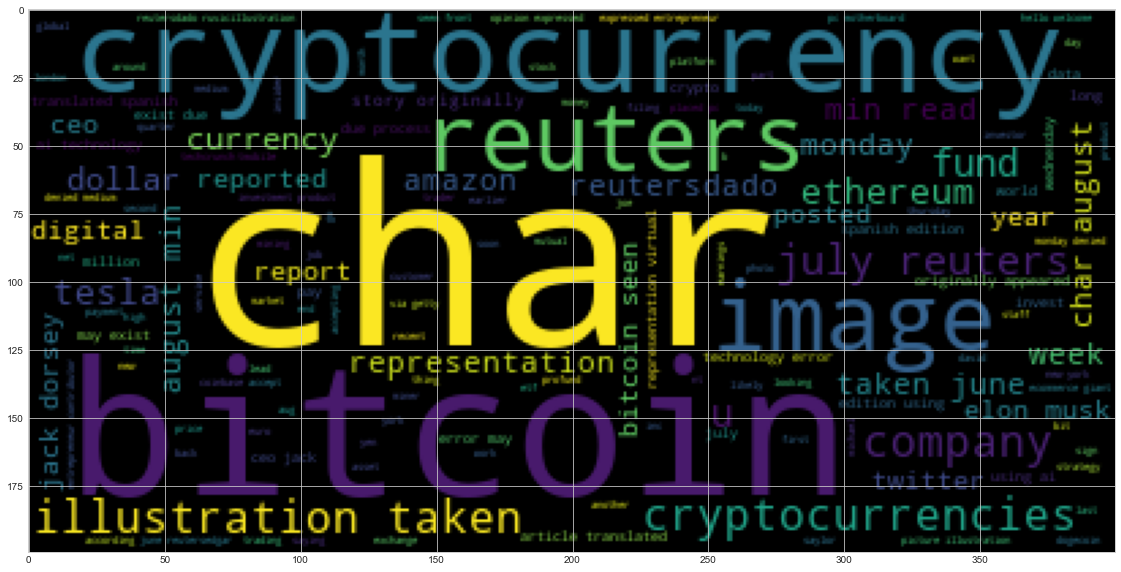

In [79]:
# Generate the Bitcoin word cloud
big_string = ' '.join(all_btc_words)
wc = WordCloud().generate(big_string)
plt.imshow(wc)

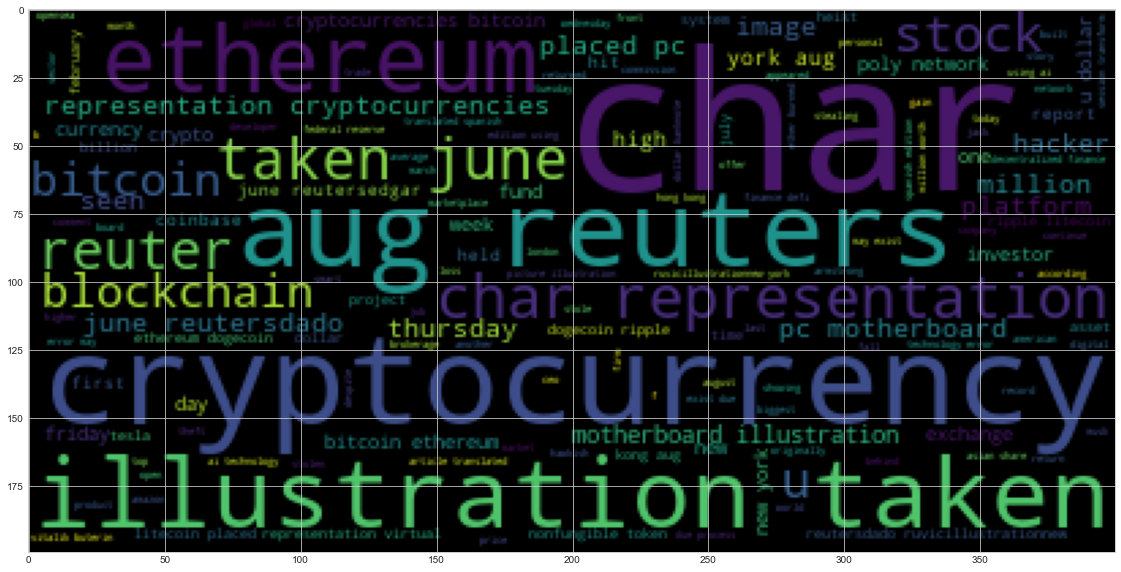

In [80]:
# Generate the Ethereum word cloud
big_string = ' '.join(all_eth_words)
wc = WordCloud().generate(big_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [82]:
import spacy
from spacy import displacy

In [83]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.1.0/en_core_web_sm-3.1.0-py3-none-any.whl (13.6 MB)

2021-08-20 06:11:16.601576: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-08-20 06:11:16.601658: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [84]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [85]:
# Concatenate all of the Bitcoin text together
all_btc_text = [row for row in btc_sentiment['text']]
all_btc_text = ' '.join(all_btc_text)
all_btc_text[:2000]

'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars] Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars] Photo by Joe Raedle/Getty Images\r\n\n \n\n Twitter and Square CEO Jack Dorsey, a noted superfan of Bitcoin, claimed on Monday that the cryptocurrency will eventually unite the world. Yes, really.\nOn Mond… [+2119 chars] Retailers are increasingly accepting cryptocurrency for physical items, but did you know\xa0you can spend crypto on ephemeral experiences like travel too? As more cryptocurrency holders indicate a willi… [+2783 chars] By Joe TidyCyber reporter \r\n"Follow the money" - for generations it\'s been the mantra of investigators looking for criminals.\r

In [86]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data["title"] = "BITCOIN NER"

In [87]:
# Render the visualization
displacy.render(doc, style='ent')

In [88]:
# List all Entities
doc.ents[:20]

(Reno,
 El Salvador,
 Aldo Baoicchi,
 Canadian,
 Daymak,
 Joe Raedle,
 Twitter,
 Square,
 Jack Dorsey,
 Monday,
 Joe TidyCyber,
 every day,
 3 p.m. PDT,
 Daily Crunch,
 July 23, 2021,
 two years,
 roughly 49 million,
 Michael Arrington,
 TechCrunch,
 Crunchbase)

---

### Ethereum NER

In [89]:
# Concatenate all of the Ethereum text together
all_eth_text = [row for row in eth_sentiment['text']]
all_eth_text = ' '.join(all_eth_text)
all_eth_text[:2000]

'Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars] Cent was founded in 2017 as an ad-free creator network that allows users to offer each other crypto rewards for good posts and comments — it’s like gifting awards on Reddit, but with Ethereum. But in… [+6228 chars] After the bell today, Coinbase reported another period of impressive results in its second quarter earnings report.\r\nDuring the quarter, Coinbase’s total revenue reached $2.23 billion, which helped t… [+4900 chars] Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/IllustrationNEW YORK, Aug 5 (Reuters) - A maj… [+439 chars] HONG KONG, Aug 5 (Reuters) - Ether held near two-month highs on Thursday ahead of a major adjustment to its underlying ethereum blockchain

In [90]:
# Run the NER processor on all of the text
doc = nlp(all_eth_text)

# Add a title to the document
doc.user_data["title"] = "Etherrum NER"

In [91]:
# Render the visualization
displacy.render(doc, style='ent')

In [93]:
# List all Entities
doc.ents[:20]

(2017,
 Reddit,
 Ethereum,
 today,
 Coinbase,
 its second quarter,
 the quarter,
 Coinbase,
 $2.23 billion,
 Ethereum,
 February 3, 2018,
 REUTERS,
 Dado Ruvic,
 Aug 5,
 Reuters,
 HONG KONG,
 Aug 5,
 Reuters,
 two-month,
 Thursday)